In [1]:
import numpy as np
np.random.seed(42) # Set the random seed so results are always the same when re-running the notebook

# Practical Machine Learning introduction with Python

Machine learning (ML) is the study of algorithms allowing computers to perform a task without being explicitly programmed for it but instead by learning from data.

## Supervised learning

The most common field of ML algorithms are the supervised learning algorithms. Supervised algorithms learn to perform a task by using a dataset of input/output pairs.

In practice, if we have a dataset of m "training examples" (a pair of input/output), we can represent it as

$(\vec{x^i},y^i)$,

where $i$ is the index of the pair of input/output and ranges over $1, ..., m$, where $m$ is the amount of $(\vec{x},y)$ pairs present in the dataset. $\vec{x}$ is an input and $y$ is an output.

The goal of a supervised algorithm is to find a good hypothesis function $h$ representing the relation $h(\vec{x})=y$. In practice, we cannot hope to find a perfect hypothesis function $h$ such that $h(\vec{x^i})=y^i$ for all i in our dataset and that would also be true for new data samples drawn from a different dataset. Instead, the hypothesis function $h$ only gives an approximation $\hat{y}$ of the true value $y$, so we have $h(\vec{x})=\hat{y}$. Supervised ML algorithms allows us to find a good hypothesis function $h$ that reduce as much as possible the error between the predictions $\hat{y}^i$ and the true values $y^i$.

Another way to represent the dataset $(\vec{x^i},y^i)^{i=1,...,m}$ is to use the matrix form: $(X,\vec{y})$, where $X=(x^i_j)^{i=1,...,m}_{j=1,...,n}$ and $\vec{y}=(y^i)^{i=1,...,m}$. So $X$ is a $m$x$n$ matrix of $m$ vectors $x^i$ of dimension $n$, and $\vec{y}$ is a vector of dimension $m$.

## Regression

There are two main types of tasks that supervised algorithms can perform:  regression or classification. The choice depends on the data type of the output $y$. If $y$ is continuous ($y \in \mathbb{R}$), then we are performing a regression. 

As an example application of regression, we will try to estimate the median housing price of an area from different housing attributes of this area.

Scikit-learn is a Python library offering a great variety of ML algorithms. Its "datasets" module also offer a quick way to load a few "toy" datasets  (i.e. simple datasets useful for education and for testing ML algorithms).

In [2]:
####################### Tip ###############################################
# We load the California Housing dataset using the scikit-learn library
###########################################################################
from sklearn.datasets import fetch_california_housing

california_housing_dataset = fetch_california_housing()

Let's have a look at this dataset object

In [3]:
california_housing_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

The dataset has a dictionary form.

Using the different keys, we can recover our inputs $X$ ('data'), our targets $\vec{y}$ ('target'), the name of each attributes for $X$ ('feature_names') and a descriptive string about the dataset ('DESCR').

In [4]:
####################### Tip ##########################
# column = california_housing_dataset ['column_name']
######################################################
X = california_housing_dataset["data"]
y = california_housing_dataset["target"]
feature_names = california_housing_dataset['feature_names']

print(california_housing_dataset["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

From the description of this dataset, we learn that there are $m=20640$ pairs of $(\vec{x},y)$. Each $\vec{x}$ is an 8-dimensional vector representing different housing attributes, and $y$ is the median house value for a district in \\$100,000.

## A little deviation about NumPy

Python is a very popular programming language in science and particularly in ML but it is not due to its computing speed. In fact, Python is quite slow if we want to use it in itself to compute mathematical operations such as matrix or vector multiplication and addition, which are the most frequent type of operation in ML algorithms. What makes Python popular is its large choice of libraries giving access to powerful algorithms written in some other more computationally efficient languages, such as C or Fortran for example.

Numpy is the most important Python library for mathematical operations. It allows to transform Python lists into a numpy object, more specifically a numpy ndarray (an $n$-dimensional array), for which Numpy allows us to apply a variety of mathematical operations very easily and very efficiently in terms of computing speed (much more than if we were to write everything in Python code). Numpy is a central Python library and most of the other scientific Python libraries also use its ndarray data format.

I invite you to check the introduction to the Numpy library: https://numpy.org/doc/stable/user/absolute_beginners.html

Let's see a few operations that can be done using Numpy:

In [5]:
####################### Tip ##########################
# we can create a vector from a python list like this
######################################################
vector_a = [1,2,3]
vector_a = np.array(vector_a)

vector_a

array([1, 2, 3])

In [6]:
# or directly like this
vector_b = np.array([4,5,6])

# there is a bunch of other ways to create arrays
vector_c = np.ones(3, dtype=int) # the argument is the dimensional shape of the tensor, here we create a vector of dim=3

# then we can do operations such as additions
print(f"{vector_a} + {vector_c} = {vector_a + vector_c}")

[1 2 3] + [1 1 1] = [2 3 4]


We can do the Hadamard product (or element wise multiplication): $ \vec{a} \odot \vec{b} = (a^i * b^i)$

In [7]:
# Hadamard product

print(f"{vector_a} * {vector_b} = {vector_a * vector_b}")

[1 2 3] * [4 5 6] = [ 4 10 18]


Or the dot product: $\vec{a} \cdot \vec{b} = \sum_{i} a_i b_i$
<img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/matrix-representation-of-dot-product-1626103121.png"/>

In [8]:
# the dot product 
np.dot(vector_a,vector_b)

32

Let's see a few examples of operations using matrices now

In [9]:
####################### Tip ##########################
# np.ones(Rows, Columns)
######################################################
A = np.ones((4,3),dtype=int) 
A

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [10]:
# We can check its shape (= its dimensions)
A.shape

(4, 3)

In [11]:
# similarly for our vector a
vector_a.shape

(3,)

In [12]:
# we can perform the matrix multiplication
A.dot(vector_a) # it is the same than doing np.dot(A, a)

array([6, 6, 6, 6])

In [13]:
# We can generate a random matrix with values drawn from a normal distribution [0,1)
B = np.random.randn(4,3)
B

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

Numpy allows us to obtain easily the transposed of a matrix, to perform for example the product $A^T \cdot B$

In [14]:
np.dot(A.T, B)

array([[ 4.14151687, -0.06840064, -0.52165256],
       [ 4.14151687, -0.06840064, -0.52165256],
       [ 4.14151687, -0.06840064, -0.52165256]])

Now, let's get back to our housing dataset.

In [15]:
# Let's check what type of object is X
type(X)

numpy.ndarray

As you can see, our dataset loaded from the scikit learn library is already in a numpy ndarray format. Let's explore a bit our dataset.

In [16]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("feature_names:", feature_names)
print("x0 =", X[0])
print("y0 =", y[0])

X shape: (20640, 8)
y shape: (20640,)
feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
x0 = [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
y0 = 4.526


## Introducing Pandas

A useful library when working with tabular data is Pandas. It is basically Excel but in Python. Its advantage is that we can attribute a name to each column in our dataset, so we can use the feature names.

In [17]:
import pandas as pd

# A pandas dataframe object is a table, to which we can assign names to the columns
X_df = pd.DataFrame(X, columns=feature_names)
X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Pandas allows to perform different transformations to a table (called a "dataframe" in pandas terminology), and the main interest of this library is that we can more easily identify each column by its name, instead of its index. If we don't have or just don't care about the name of each columns, pandas is not really useful in this context.

Usually, real life datasets are messy. There is some missing data, sometimes some wrong values and very often there is some useless data. Also, sometimes the data is not numeric: it can be the string data type, which we cannot simply feed as input to our ML model. For all these reasons, it is almost always necessary to transform the dataset before it is usable by our model, and pandas can be a useful library for that.

To learn more about pandas: https://pandas.pydata.org/docs/user_guide/10min.html

In [18]:
# Pandas allows us to select a column by its name
X_df["MedInc"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

A single column is a 1-dimensional array, or simply a vector.

In [19]:
# We can also select a list of columns, returning a datafram
X_df[["MedInc", "Population", "AveOccup"]]

,MedInc,Population,AveOccup
0,8.3252,322.0,2.555556
1,8.3014,2401.0,2.109842
2,7.2574,496.0,2.802260
3,5.6431,558.0,2.547945
4,3.8462,565.0,2.181467
...,...,...,...
20635,1.5603,845.0,2.560606
20636,2.5568,356.0,3.122807
20637,1.7000,1007.0,2.325635
20638,1.8672,741.0,2.123209


## Divising our dataset into a training, validation and test set

Before training our first model, we need to split the dataset into a training, a validation and a test set. We need to do this to avoid overfitting our dataset, i.e. finding a model that performs well only on our training dataset and not well on new data unseen during training by our model. Overfitting is a problem that you are more likely to experience if you use a ML model that is too complex (with many parameters) compared to the amount of training data samples (too few). Your model can also suffer from the opposite problem, which is underfitting. This happens if you choose a model that is too simple to represent the (more complex) relationships present in the training data available (a lot of data). By splitting our dataset into 3 parts, we can avoid both overfitting and underfitting and select a good model that will perform well on new unseen data. 

The training set is obviously the subset of data used to train the model (to optimise its parameters), the validation set is used to evaluate and intercompare different candidate models and then select the model performing the best on this dataset. Then, if we have evaluated a lot of models on our validation subset of data, it may be possible that this model was simply "lucky" on this validation dataset, so to have a final independent evaluation of that model, we finally use the test set for evaluation.

The ratio of data samples allocated to each of the training/validation/test set depends on the problem and the quantity of data available in total. In general, we want as much as possible data for training, while keeping enough data in the validation and test set so that the evaluation of the models stays statistically meaningful.

In the case of our housing dataset, we have about 20000 data samples, a good data spliting ratio is 80% / 10% / 10%.

#### Important remark

Scikit-learn has function that allows to split easily our dataset into two parts, using it twice will allow us to have our three datasets. Also, this function **splits randomly**. This is very important to do if you want to sample subsets that are statistically independent. For example, if the dataset was ordered in term of house pricing, and you would take the last 10% of data samples in your test set, your test set would be the 10% most expensive house districts, which would not actually represent well the statistics of all the house districts in California.

Using this function will also give you a randomly sorted training dataset, which is necessary for training some specific ML models, such as those using gradient descent.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5)

print("# of data samples for training:", len(X_train))
print("# of data samples for validation:", len(X_val))
print("# of data samples for testing:", len(X_test))

# of data samples for training: 16512
# of data samples for validation: 2064
# of data samples for testing: 2064


### Exploratory data analysis

Before training our first model, it is always helpful to explore the data a bit further than just reading its descriptive file. The minimum is to learn a bit more about the main statistics of our dataset, and particularly for the target data (the output data, or y if you prefer). Because learning about the statistics of the dataset can guide your choice toward some particular ML algorithm, you should only explore the training dataset.

We will begin by computing the statistics about the y_train values.

In [21]:
print("Statistics about y training data")
print("mean:", np.mean(y_train))
print("standard deviation:", np.std(y_train))
print("minimum:", np.min(y_train))
print("maximum:", np.max(y_train))

Statistics about y training data
mean: 2.0729028439922477
standard deviation: 1.1558734503987778
minimum: 0.14999
maximum: 5.00001


So, there is some district where the median housing price is only \$15 000... That is quite cheap. Also, the maximum median housing price for a district is only \$500 000, that is not that much (we are talking about California here, so that includes Hollywood, LA, San Francisco, etc...) but let's remember that this dataset is quite old, being from 1990. The average housing price is almost in the middle of the two extremum values, so maybe our data is normally distributed ? To verify this we will need to do a plot.

### Visualizing data

For plotting your data, you won't escape the library matplotlib (https://matplotlib.org/3.5.0/tutorials/introductory/pyplot.html). Let's plot a simple histogram:

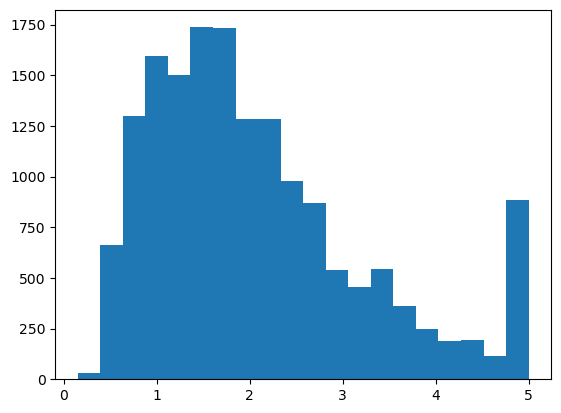

In [22]:
import matplotlib.pyplot as plt

plt.hist(y_train, 20);

We see that the data is not really normally distributed, it is skewed to the right here. We can also see that there is an anormally high frequency of prices at about \$500 000. The maximum value for the prices is also suspect because it exactly \$500 000. This indicates that there is a maximum threshold that was applied to the dataset.

## Linear Regression

The first example of supervised algorithm that we are going to see is the linear regression.

Scikit-learn is a library offering a large collection of ML algorithms and tools to perform a typical ML application. A quick tutorial of Scikit-learn is available at https://scikit-learn.org/stable/getting_started.html and a list of the supervised algorithm offered by Scikit-learn can be found here https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

We will begin with the most simple form of ML model for a regression, which is the linear regression: $\hat{y} = \vec{w} \cdot \vec{x} + b$, where $\vec{w}$ and $b$ are the parameters of the model. ML algorithms optimise their parameters with a dataset by minimising a **loss function**, i.e. a measure of the distance between the estimations made by the model $\vec{\hat{y}}$ and the true values $\vec{y}$. In the case of a linear regression, we select the parameters $\vec{w}$ and $b$ that minimise the mean squared error (mse) between $\vec{\hat{y}}$ and $\vec{y}$.

After importing the linear regression model from scikit-learn, we need to create an instance of it.

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

### Training a model

Then, to train the model, we only need to call the method "fit" and pass the training dataset like this:

In [24]:
lin_reg.fit(X_train, y_train)

LinearRegression()

It is as simple as that, and this is the same for all ML models (called "estimators" in the scikit-learn terminology) from the scikit-learn library. Just keep in mind that this simple function call hides a complex optimization or search procedure such as the one we have seen in Module 4, in order to find the right parameters of the ML algorithm.

We can obtain the parameters found after training like this:

In [25]:
w = lin_reg.coef_
b = lin_reg.intercept_

print("w = ", w)
print("b=", b)

w =  [ 4.44469130e-01  9.49985492e-03 -1.18314950e-01  7.80177574e-01
 -2.73454672e-06 -3.42848457e-03 -4.26598312e-01 -4.39284987e-01]
b= -37.44733469895098


### Making new predictions with a trained model and evaluating it

We can now evaluate our model on the validation dataset. To do so, we first make the estimations $\vec{\hat{y}}_{validation}$ and then we compute the mse between it and the true values $\vec{y}_{validation}$

In [26]:
y_hat_linreg_val = lin_reg.predict(X_val)

In [27]:
# we can load a function to compute the mse
from sklearn.metrics import mean_squared_error

lin_reg_mse_val = mean_squared_error(y_hat_linreg_val, y_val)
lin_reg_mse_val

0.5957864533826795

If we were less lazy, or simply forgot about the existence of the `mean_squared_error` function, we could also compute easily the mse using numpy:

In [28]:
np.mean((y_hat_linreg_val - y_val) ** 2)

0.5957864533826795

This measure of the error of our model is not very interpretable, the root mean square error (rmse) is better on that point. Let's compare it with the average value of $\vec{y}_{validation}$ to evaluate a bit better the estimated error of our model.

In [29]:
lin_reg_rmse_val = np.sqrt(lin_reg_mse_val)
y_val_mean = np.mean(y_val)

print("rmse_val =", lin_reg_rmse_val)
print("y_val_mean =", y_val_mean)
print("rmse_val / y_val_mean =", lin_reg_rmse_val/y_val_mean)

rmse_val = 0.7718720446956734
y_val_mean = 2.022349723837209
rmse_val / y_val_mean = 0.38167090271168447


### Comparing our result with a heuristic model

So, in average, the housing price for the validation dataset is about \$200 000 and the estimated error is \$35 000, which sounds reasonable. But to interpret more these results, and before testing a more complex ML algorithm, a good practice is to compare our result with a heuristic estimation. For example, we could choose $\hat{y} = mean(\vec{y}_{training})$, it is simple model that outputs a constant, the average value of the output values in the training dataset. This may sound ridiculously too simple, but sometimes you can spend hours trying to find the best ML algorithm and actually end up with a result that is not much better than a simple heuristic. This usually happens when the quality of the dataset is not good, i.e. when there is not much data and/or there is not much relation between the input and the output. Depending on the distribution of $y$, the median may be a better heuristic than the mean, so we will also verify the performance of the median.

### How to compare the performance of different models ?

To compare the performance of different models, you usually should not restrict yourself to only compare their respective loss values (the mse in our current regression problem). You can compute a multitude of metrics that can help you identify some problem in the performance of your model, that you would not be able to detect if you were only looking at the loss value otherwise. Scikit-learn allows you to compute a few popular metrics (https://scikit-learn.org/stable/modules/model_evaluation.html) but you do not have to restrict yourself to those. For example, in our housing prices problem, we could be particularly interested by models performing well for expensive houses, pricing above \$300 000. Let's build a function allowing us to compute the rmse of those expensive houses.

In [30]:
def expensive_rmse(y_hat, y_true, thr_price=3.5):
    """
    Return the rmse between the predicted house prices and the true house prices
    for the houses pricing above the given price threshold.
    """
    
    # We compute a mask to identify houses more expensive than the threshold price
    expensive_mask = y_true >= thr_price
    
    # We use the mask to keep only the houses pricing above the threshold
    y_true = y_true[expensive_mask]
    y_hat = y_hat[expensive_mask]
    
    # We compute the mse and return the root of the mse
    mse = np.mean((y_hat - y_true) ** 2)
    return np.sqrt(mse)

We now compute the loss value (the mse), the rmse, and the rmse of expensive houses on the validation dataset for the linear regression model, and the average and median heuristic models.

In [31]:
# we already computed the mse and rmse for the lin reg model above
# so we only have to compute the rmse for expensive houses using the lin reg model
linreg_exp_rmse_val = expensive_rmse(y_hat_linreg_val, y_val)


# Heuristic mean model.
# we compute the training mean value of houses, then create a vector with the same dimension than
# the y_val vector with the mean training value everywhere.
y_train_mean = np.mean(y_train)
y_hat_mean_val = np.ones_like(y_val) * y_train_mean

# we compute the different metrics for the heuristic mean model
heuristic_mean_mse_val = np.mean((y_hat_mean_val - y_val) ** 2)
heuristic_mean_rmse_val = np.sqrt(heuristic_mean_mse_val)
heuristic_mean_exp_rmse_val = expensive_rmse(y_hat_mean_val, y_val)

# Same as above but for the heuristic median model
y_train_median = np.median(y_train)
y_hat_median_val = np.ones_like(y_val) * y_train_median

heuristic_median_mse_val = np.mean((y_hat_median_val - y_val) ** 2)
heuristic_median_rmse_val = np.sqrt(heuristic_median_mse_val)
heuristic_median_exp_rmse_val = expensive_rmse(y_hat_median_val, y_val)

# We print all results
print("MSE")
print("LinReg:", lin_reg_mse_val)
print("Heuristic mean:", heuristic_mean_mse_val)
print("Heuristic median:", heuristic_median_mse_val)

print("\nRMSE")
print("LinReg:", lin_reg_rmse_val)
print("Heuristic mean:", heuristic_mean_rmse_val)
print("Heuristic median:", heuristic_median_rmse_val)

print("\nRMSE expensive houses")
print("LinReg:", linreg_exp_rmse_val)
print("Heuristic mean:", heuristic_mean_exp_rmse_val)
print("Heuristic median:", heuristic_median_exp_rmse_val)

MSE
LinReg: 0.5957864533826795
Heuristic mean: 1.3065588360035056
Heuristic median: 1.3516798199458815

RMSE
LinReg: 0.7718720446956734
Heuristic mean: 1.1430480462358115
Heuristic median: 1.162617658538645

RMSE expensive houses
LinReg: 1.5071673512166848
Heuristic mean: 2.3753399557929598
Heuristic median: 2.63768469545378


Thoses results are clearly showing that the linear model is performing much better than the heuristics, and the linear model being still a very simple model, we probably can try a more complex model. But before doing that, you can compare the training and validation loss value, which can allow us to verify if we are underfitting (the model is too simple for our dataset/problem) or overfitting (the model is too complex for our dataset/problem).

In [32]:
y_hat_linreg_train = lin_reg.predict(X_train)
lin_reg_mse_train = np.mean((y_hat_linreg_train - y_train) ** 2)

print("training loss:", lin_reg_mse_train)
print("validation loss:", lin_reg_mse_val)

training loss: 0.5184038842448244
validation loss: 0.5957864533826795


This is a big difference between the two loss values... But is it significant ? You may think so, but try to re-run the notebook after changing the random seed from 42 to 0, and check the new loss values found. You will then find a difference between the two loss not looking so significant! To be able to increase the statistical accuracy of our validation loss, we would need to increase the size of the validation dataset, but we do not want to reduce the training dataset size either... The solution in those cases is using cross-validation.

### Cross validation

![](figures/cross_validation.png)

Image from: https://scikit-learn.org/stable/modules/cross_validation.html

The principle of cross validation is to fuse the training and validation datasets together, then to divide this dataset in $n$ folds, typically $2 \leq n \leq 10$ (in the picture above n=5). Then, we train a model using all but one of the fold, which is then used to compute a validation loss. Repeating this for all folds, and then averaging all the different validation loss, we are able to compute the validation loss on much more data samples, and have a final validation loss that is more significant.

Scikit learn offers different way to do cross validation, here we will just use a function to help us split our training and validation data into 5 folds, then do the cross validation ourself.

In [33]:
from sklearn.model_selection import KFold

# we create a 5 folds splitting object that will return the training and validation indexes for our 5 folds
kf = KFold(n_splits=5)

# We fuse the training and validation set together
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))

# Lists to save the losses
train_mses = []
val_mses = []

# loop through the different folds
for train_indexes, val_indexes in kf.split(X_trainval):
    
    # create an new linreg model, untrained
    lin_reg_temp = LinearRegression()
    # train the model on a subset of the training data
    lin_reg_temp.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = lin_reg_temp.predict(X_trainval[train_indexes])
    y_hat_val_temp = lin_reg_temp.predict(X_trainval[val_indexes])
    
    # compute the losses
    mse_train_temp = np.mean((y_hat_train_temp - y_trainval[train_indexes]) ** 2)
    mse_val_temp = np.mean((y_hat_val_temp - y_trainval[val_indexes]) ** 2)
    
    # append the loss values to the lists
    train_mses.append(mse_train_temp)
    val_mses.append(mse_val_temp)
    
print(f"Mean training loss: {round(np.mean(train_mses), 3)} std: {round(np.std(train_mses), 3)}")
print(f"Mean validation loss: {round(np.mean(val_mses), 3)} std: {round(np.std(val_mses), 3)}")

Mean training loss: 0.524 std: 0.005
Mean validation loss: 0.534 std: 0.025


The two loss values are very close, with the validation loss bigger than the training loss, which is expected. In the case of underfitting, those two values are almost identical, so it is highly likely that our linear model is underfitting. 

Knowing that we are underfitting, we can try more complex non-linear models. This would be a good exercise to try at least 2 other more complex models, compare their performance on the validation dataset and try to tell if they are overfitting or not. And finally, evaluate the best model on the test dataset to have a final evaluation of its performance. Before evaluating the best model on your test set, you should re-train it on the merged training-validation dataset, to maximize your training data.

## Classification

After having seen an example of a regression problem, we will now look at an example of classification problem. For a classification, the output data does not take a continuous value, it is instead a label, or a class. As an example for a classification problem, we will use the iris dataset.

In [34]:
from sklearn.datasets import load_iris

iris_ds = load_iris()
print(iris_ds.keys())
print(iris_ds["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [35]:
X = iris_ds["data"]
y = iris_ds["target"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


As you can see from the description, the output data can take 3 different values, which are 3 types of flower. Those three classes are Iris-Setosa, Iris-Versicolour and Iris-Virginica. The input data has 4 attributes, which are the length and width measurements of the sepal and petal of each flower, and there are measurements for 150 flowers in the dataset. 

### Statistical study of a classification dataset

The statistics about the input data and output data are already given in the description. In a classification problem, the frequency of appearance for each class in the dataset is very important. In this dataset, the three classes are balanced, there 50 appearances for each of the 3 classes. Usually this is not the case and it can be a problem. For example, a model trained on a dataset where one class is under-represented will usually have more trouble to correctly classify this particular class. Also, if the dataset is not balanced, you will need to look at different metrics to correctly assess the performance of a model. For example, the accuracy of a model is a performance metric that is not necessary very informative when a dataset is very imbalanced and the F1 score is much more useful in that case (https://en.wikipedia.org/wiki/F-score).

When dealing with categorical data, the data is usually represented as an integer value $k=0,...,K-1$ where K the number of different category/class existing. Sometimes the data has a string format, and the value have the name of the category. When this is the case, we first need to convert the classes from string to an integer value. As you can see below, the values of $y$ are already integer.

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Splitting the dataset into training and test set

There are only 150 data samples, so we will use cross-validation instead of splitting our dataset into a training, a validation and test set. What ratio between training and testing should we choose ? Anything under 30 data samples for testing is going to be too low to evaluate properly our dataset. I will choose to keep 50 data samples for testing.

In [37]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=50)

## Logistic regression

We will use the classifier version of the linear regression model used previously: the logistic regression. This linear model predict a probability a score for each class, and then select the class with the highest estimated probability as the predicted class.

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression()

In [39]:
# scikit-learn offer functions to compute different metrics, such as the accuracy
from sklearn.metrics import accuracy_score

When the dataset is very small, it is better use cross validation with a higher number of folds, so that we can use a higher amount of training sample. The reason we do not always use a high number of fold is to reduce the computing time. Indeed, for each fold you have, you need to retrain a model, which can be quite long depending on the dataset size and the ML algorithm used.

In [40]:
kf = KFold(10)

train_folds_acc = []
val_folds_acc = []

for train_indexes, val_indexes in kf.split(X_trainval):
    
    # Initialize a new logreg classifier and train it
    log_reg_clf = LogisticRegression(max_iter=200)
    log_reg_clf.fit(X_trainval[train_indexes], y_trainval[train_indexes])
    
    # make prediction for training and validation dataset
    y_hat_train_temp = log_reg_clf.predict(X_trainval[train_indexes])
    y_hat_val_temp = log_reg_clf.predict(X_trainval[val_indexes])

    # compute the accuracy
    acc_train_temp = accuracy_score(y_hat_train_temp, y_trainval[train_indexes])
    acc_val_temp = accuracy_score(y_hat_val_temp, y_trainval[val_indexes])
    
    # append the accuracy values to the lists
    train_folds_acc.append(acc_train_temp)
    val_folds_acc.append(acc_val_temp)
    
print(f"Mean training accuracy: {round(np.mean(train_folds_acc), 3)} std: {round(np.std(train_folds_acc), 3)}")
print(f"Mean validation accuracy: {round(np.mean(val_folds_acc), 3)} std: {round(np.std(val_folds_acc), 3)}")

Mean training accuracy: 0.978 std: 0.007
Mean validation accuracy: 0.96 std: 0.049


The accuracy obtained is pretty good, both on the training and validation set. This type of small dataset is very easy to overfit if you use a more complex model, and you could then obtain 100% accuracy on the training dataset. It is not the case here and the validation accuracy is very close too, so we are not overfitting and we may be able to improve a bit more the accuracy by using a more complex model, which you can try to do.

### Final evaluation on test set

Let's assume we do not want to experiment with another model, that we are set on using the logistic regression model, we can now re-train the model on the merged training and validation set, and then evaluate it on the test set. 

Like already said, it is better to not restrict ourself to only one metric for evaluating a model. Scikit-learn has a good range of metrics available (https://scikit-learn.org/stable/modules/model_evaluation.html). A useful one for example is the classification_report, reporting the precision, recall and f1 score for each class.

In [41]:
# training a model on the training-valdiation dataset
log_reg_clf = LogisticRegression(max_iter=200)
log_reg_clf.fit(X_trainval, y_trainval)

# make prediction for the test dataset
y_hat_test = log_reg_clf.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

